In [12]:
import numpy as np
import matplotlib.pyplot as plt


In [13]:
# getting data from all csv files
data_64 = np.genfromtxt('timing_data_64_bytes.csv', delimiter=',')[1:]
data_128 = np.genfromtxt('timing_data_128_bytes.csv', delimiter=',')[1:]
data_256 = np.genfromtxt('timing_data_256_bytes.csv', delimiter=',')[1:]
data_512 = np.genfromtxt('timing_data_512_bytes.csv', delimiter=',')[1:]
data_1024 = np.genfromtxt('timing_data_1024_bytes.csv', delimiter=',')[1:]
data_2048 = np.genfromtxt('timing_data_2048_bytes.csv', delimiter=',')[1:]
data_4096 = np.genfromtxt('timing_data_4096_bytes.csv', delimiter=',')[1:]
data_8192 = np.genfromtxt('timing_data_8192_bytes.csv', delimiter=',')[1:]
data_16384 = np.genfromtxt('timing_data_16384_bytes.csv', delimiter=',')[1:]
data_32768 = np.genfromtxt('timing_data_32768_bytes.csv', delimiter=',')[1:]
data_65536 = np.genfromtxt('timing_data_65536_bytes.csv', delimiter=',')[1:]

data_1048576 = np.genfromtxt('timing_data_1048576_bytes.csv', delimiter=',')[1:]
data_2097152 = np.genfromtxt('timing_data_2097152_bytes.csv', delimiter=',')[1:]
data = {"64": data_64, "128": data_128, "256": data_256, "512": data_512, "1024": data_1024, "2048": data_2048, "4096": data_4096, "8192": data_8192, "16384": data_16384, "32768": data_32768, "65536": data_65536, "1048576": data_1048576, "2097152": data_2097152}

In [14]:
#computing general stats around all of the data, mean for each one
for key, value in data.items():
    print(f"Mean for {key}: {np.mean(value[:,1])}")
    print(f"Median for {key}: {np.median(value[:,1])}")
    print(f"Standard Deviation for {key}: {np.std(value[:,1])}")
    print(f"Variance for {key}: {np.var(value[:,1])}")
    print(f"Minimum for {key}: {np.min(value[:,1])}")
    print(f"Maximum for {key}: {np.max(value[:,1])}")
    print(f"Range for {key}: {np.max(value[:,1]) - np.min(value[:,1])}")
    print()
    



Mean for 64: 17.555954
Median for 64: 16.0
Standard Deviation for 64: 128.8556123851417
Variance for 64: 16603.768843149886
Minimum for 64: 12.0
Maximum for 64: 64452.0
Range for 64: 64440.0

Mean for 128: 17.677278
Median for 128: 16.0
Standard Deviation for 128: 103.80816510521085
Variance for 128: 10776.135142510715
Minimum for 128: 12.0
Maximum for 128: 51750.0
Range for 128: 51738.0

Mean for 256: 19.329774
Median for 256: 16.0
Standard Deviation for 256: 517.5625415049942
Variance for 256: 267870.9843691088
Minimum for 256: 12.0
Maximum for 256: 154324.0
Range for 256: 154312.0

Mean for 512: 17.836866
Median for 512: 16.0
Standard Deviation for 512: 71.89444311835265
Variance for 512: 5168.8109512980445
Minimum for 512: 12.0
Maximum for 512: 30656.0
Range for 512: 30644.0

Mean for 1024: 33.110013
Median for 1024: 20.0
Standard Deviation for 1024: 1397.1932635595335
Variance for 1024: 1952149.0157361403
Minimum for 1024: 14.0
Maximum for 1024: 1176052.0
Range for 1024: 1176038.0

[64, 128, 256, 512, 1024, 2048, 4096, 8192, 16384, 32768, 65536, 1048576, 2097152]


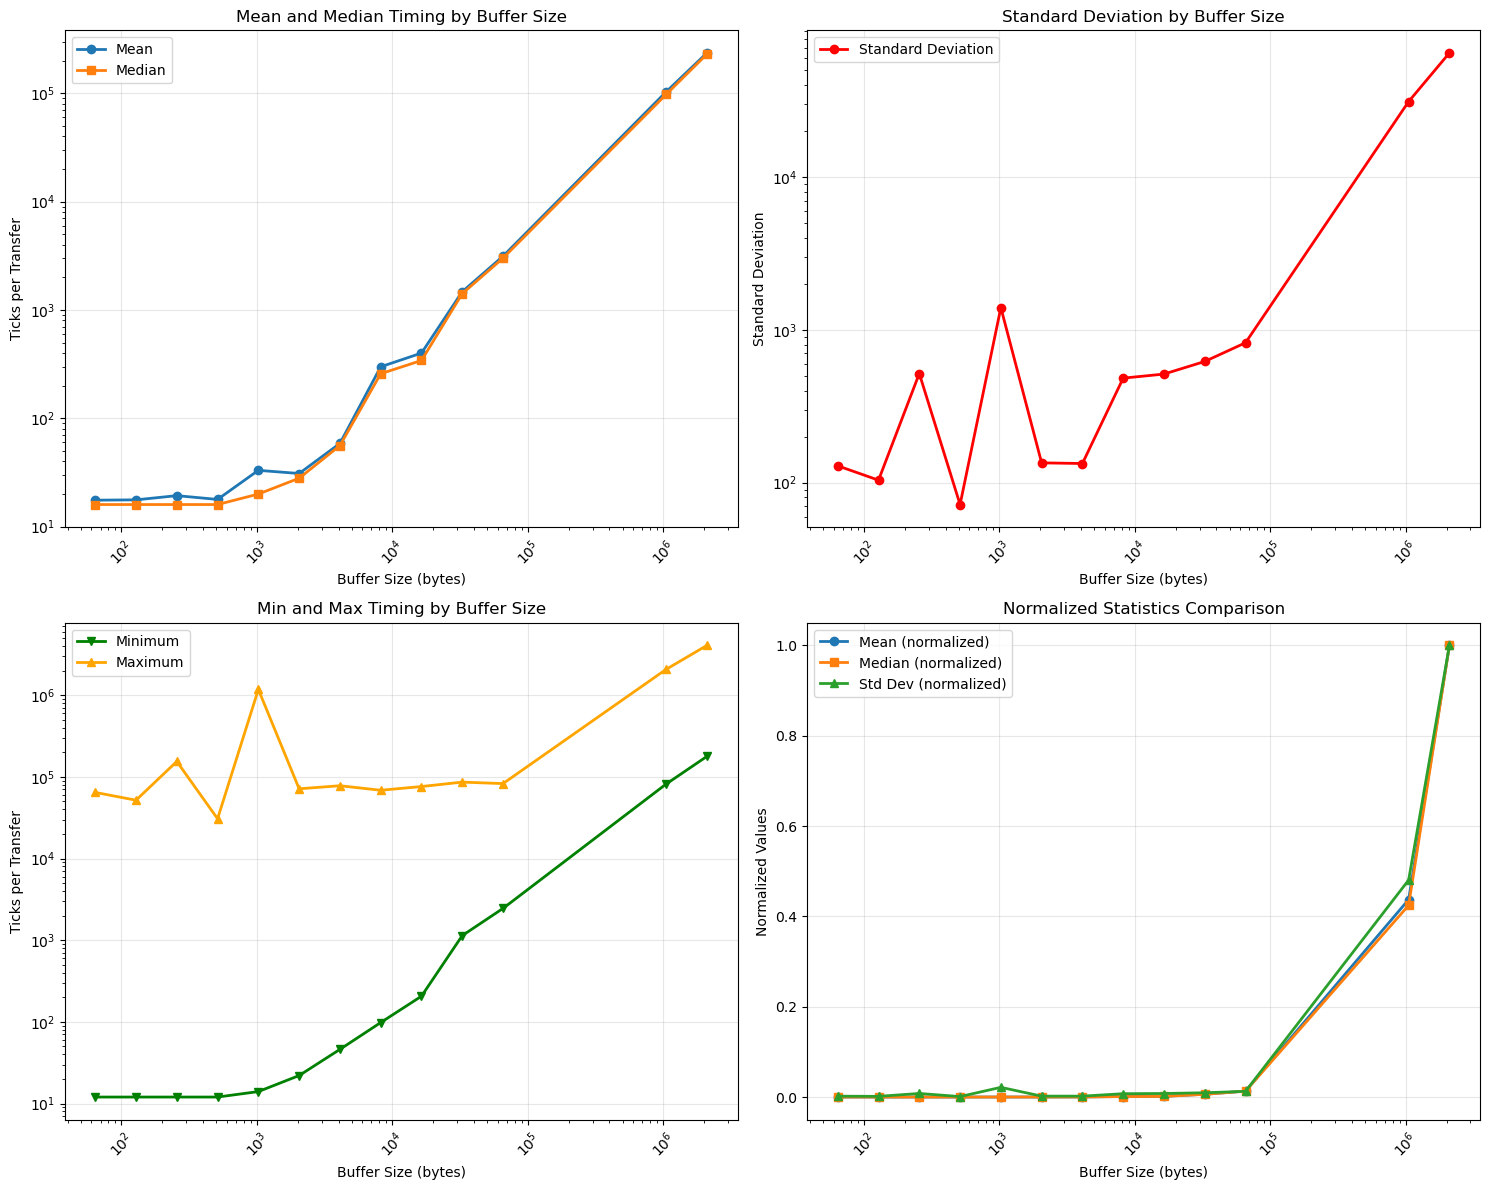

In [15]:
# Plot statistical measures with legend
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 12))

# Extract buffer sizes and convert to integers for proper sorting
buffer_sizes = [int(k) for k in data.keys()]
buffer_sizes.sort()
buffer_labels = [str(size) for size in buffer_sizes]
print(buffer_sizes)
# Calculate statistics for each buffer size
means = [np.mean(data[str(size)][:,1]) for size in buffer_sizes]
medians = [np.median(data[str(size)][:,1]) for size in buffer_sizes]
stds = [np.std(data[str(size)][:,1]) for size in buffer_sizes]
mins = [np.min(data[str(size)][:,1]) for size in buffer_sizes]
maxs = [np.max(data[str(size)][:,1]) for size in buffer_sizes]

# Plot 1: Mean and Median
ax1.plot(buffer_sizes, means, 'o-', label='Mean', linewidth=2, markersize=6)
ax1.plot(buffer_sizes, medians, 's-', label='Median', linewidth=2, markersize=6)
ax1.set_xlabel('Buffer Size (bytes)')
ax1.set_ylabel('Ticks per Transfer')
ax1.set_title('Mean and Median Timing by Buffer Size')
ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.legend()
ax1.grid(True, alpha=0.3)
ax1.tick_params(axis='x', rotation=45)

# Plot 2: Standard Deviation
ax2.plot(buffer_sizes, stds, 'o-', color='red', label='Standard Deviation', linewidth=2, markersize=6)
ax2.set_xlabel('Buffer Size (bytes)')
ax2.set_ylabel('Standard Deviation')
ax2.set_title('Standard Deviation by Buffer Size')
ax2.set_xscale('log')
ax2.set_yscale('log')
ax2.legend()
ax2.grid(True, alpha=0.3)
ax2.tick_params(axis='x', rotation=45)

# Plot 3: Min and Max
ax3.plot(buffer_sizes, mins, 'v-', label='Minimum', linewidth=2, markersize=6, color='green')
ax3.plot(buffer_sizes, maxs, '^-', label='Maximum', linewidth=2, markersize=6, color='orange')
ax3.set_xlabel('Buffer Size (bytes)')
ax3.set_ylabel('Ticks per Transfer')
ax3.set_title('Min and Max Timing by Buffer Size')
ax3.set_xscale('log')
ax3.set_yscale('log')
ax3.legend()
ax3.grid(True, alpha=0.3)
ax3.tick_params(axis='x', rotation=45)

# Plot 4: All statistics together (normalized)
# Normalize each statistic to show relative patterns
means_norm = np.array(means) / np.max(means)
medians_norm = np.array(medians) / np.max(medians)
stds_norm = np.array(stds) / np.max(stds)

ax4.plot(buffer_sizes, means_norm, 'o-', label='Mean (normalized)', linewidth=2, markersize=6)
ax4.plot(buffer_sizes, medians_norm, 's-', label='Median (normalized)', linewidth=2, markersize=6)
ax4.plot(buffer_sizes, stds_norm, '^-', label='Std Dev (normalized)', linewidth=2, markersize=6)
ax4.set_xlabel('Buffer Size (bytes)')
ax4.set_ylabel('Normalized Values')
ax4.set_title('Normalized Statistics Comparison')
ax4.set_xscale('log')
ax4.legend()
ax4.grid(True, alpha=0.3)
ax4.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()
